<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/hw_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기 및 label, features구분


In [10]:
import pandas as pd

# CSV 읽기
train_df = pd.read_csv('/content/train.csv')
test_df  = pd.read_csv('/content/test.csv')


print(train_df.shape, test_df.shape)
# -> (42000, 785) (28000, 784) 같은지 확인

# 레이블(y)과 특성(X) 분리
y_train = train_df.iloc[:, 0].values        # 첫 번째 열이 레이블
X_train = train_df.iloc[:, 1:].values       # 나머지 픽셀
X_test  = test_df.values                    # test에는 레이블 컬럼 없음

print(X_train.shape, y_train.shape, X_test.shape)



(42000, 785) (28000, 784)
(42000, 784) (42000,) (28000, 784)


학습-검증데이터 분할


In [12]:
from sklearn.model_selection import train_test_split

# 8:2 비율로 분할 (
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train  # 레이블 분포를 맞추고 싶으면 추가
)

# 분할 후 shape 확인
print("학습셋 :", X_tr.shape, y_tr.shape)   # (33600, 784) (33600,)
print("검증셋 :", X_val.shape, y_val.shape)  # ( 8400, 784) ( 8400,)


학습셋 : (33600, 784) (33600,)
검증셋 : (8400, 784) (8400,)


1. image샘플 시각화

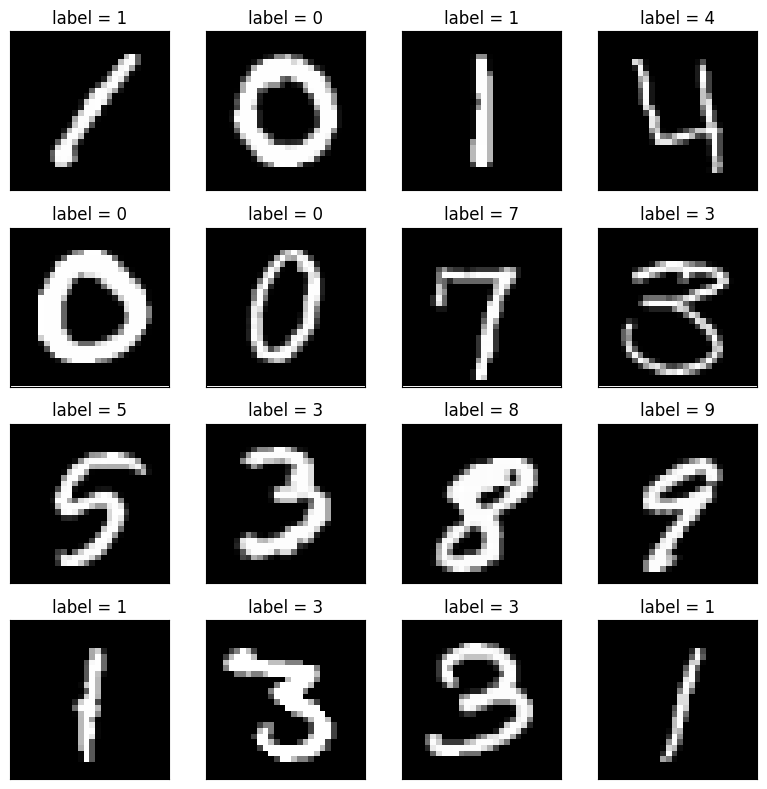

In [14]:
import matplotlib.pyplot as plt

# 4×4 그리드, figsize는 취향대로 조정
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        idx = i*4 + j   # 0,1,2,3, 4,5,6,7, ... 15
        img = X_train[idx].reshape(28, 28)

        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f"label = {y_train[idx]}")
        axes[i, j].set_xticks([])  # 축 눈금 없애기
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()



2. 모델학습

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='multinomial',
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='lbfgs',
    tol=0.001,
    verbose=0,
    warm_start=False
)

# 3) 학습
clf.fit(X_tr, y_tr)

# 4) 학습/검증 정확도 확인
train_acc = clf.score(X_tr, y_tr)
val_acc   = clf.score(X_val, y_val)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9418
Validation Accuracy: 0.9111


3.정확도평가

In [16]:
from sklearn.metrics import accuracy_score

# 1) 검증 데이터 예측
y_val_pred = clf.predict(X_val)

# 2) 정확도 평가
acc = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {acc:.3f}")


Validation accuracy: 0.911


4. 잘 분류한 이미지 출력

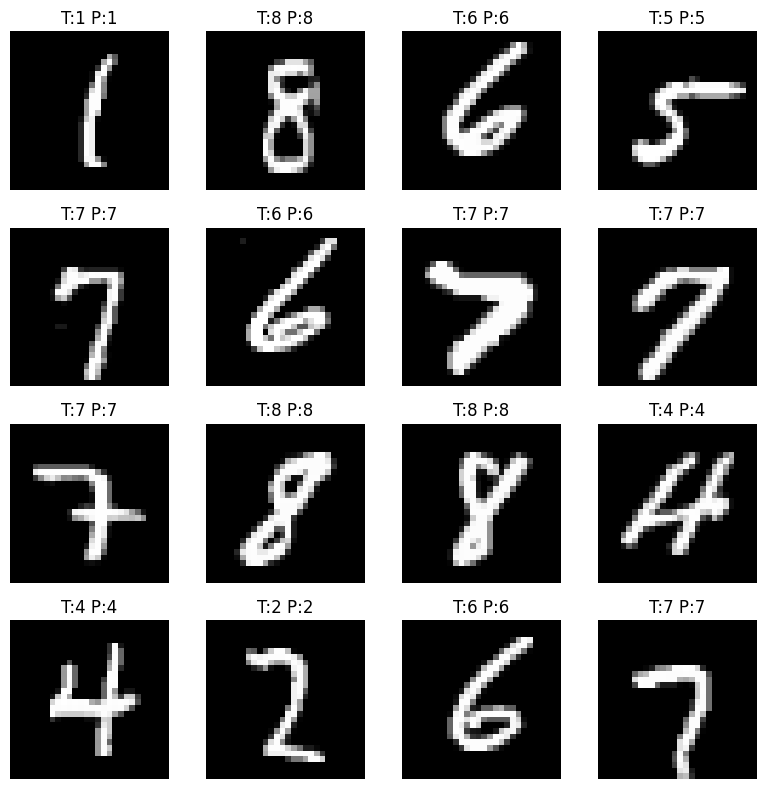

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 순서대로 0~15번 인덱스
idxs = np.arange(16)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    img = x_val_correct[idxs[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"T:{y_val_correct[idxs[i]]} P:{y_val_pred_correct[idxs[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

5. 잘못 분류한 이미지 출력

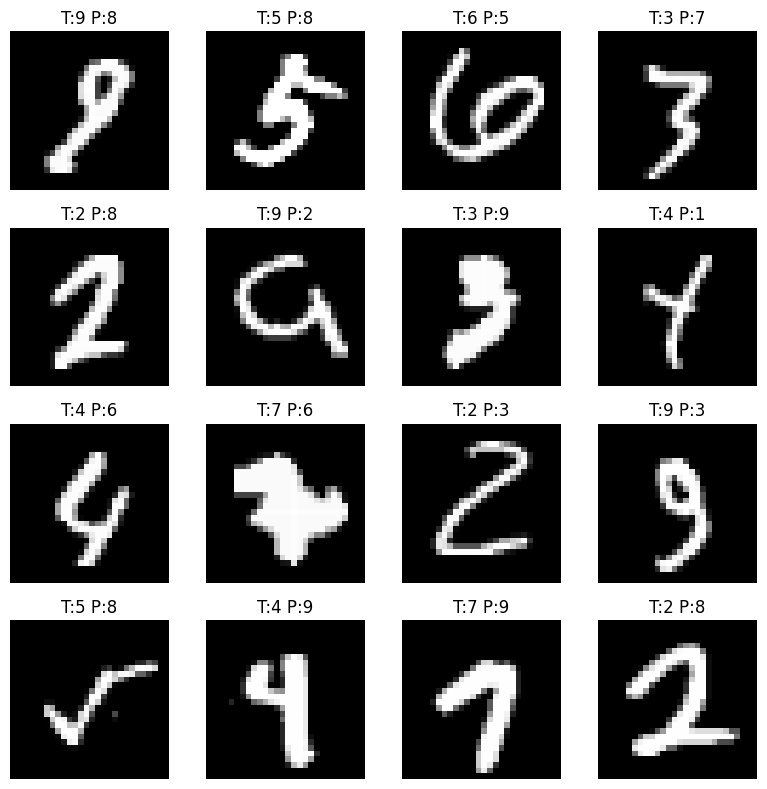

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 순서대로 0~15번 인덱스
idxs = np.arange(16)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    img = x_val_wrong[idxs[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"T:{y_val_wrong[idxs[i]]} P:{y_val_pred_wrong[idxs[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


6.테스트데이터 예측하기


In [32]:
# 이미 학습된 clf를 사용
y_test_pred = clf.predict(X_test)

# (확인용) 앞쪽 10개 예측 결과 출력
print("First 10 test predictions:", y_test_pred[:10])


First 10 test predictions: [2 0 9 7 3 7 0 3 0 3]


7. 예측값 내보내기

In [35]:

submission = pd.DataFrame({
    'id': np.arange(1, len(y_test_pred)+1),
    'label': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("submission.csv 생성 완료")


submission.csv 생성 완료
